<a href="https://colab.research.google.com/github/IgnacioGeo/Deliverables/blob/main/ProjectImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [2]:
#Data Preprocessing
# Normalize the images
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoded form
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

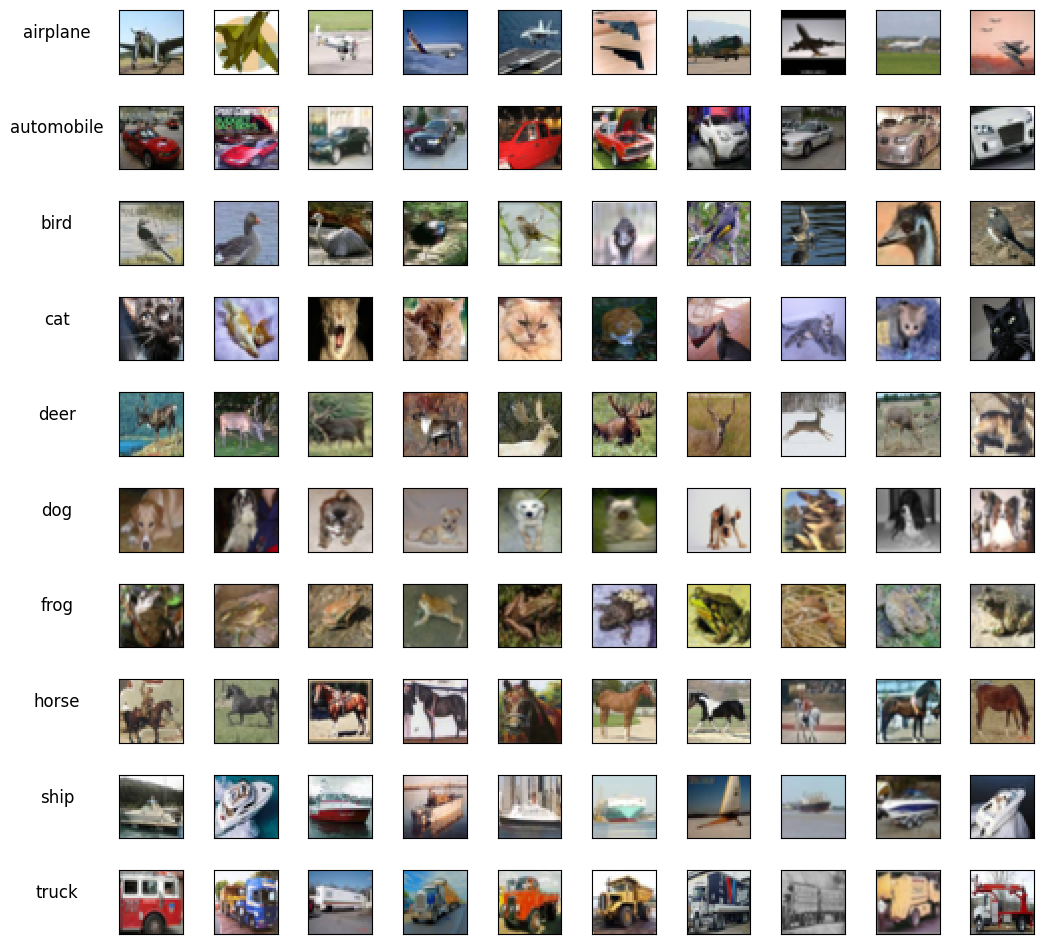

In [3]:
# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a figure
plt.figure(figsize=(12, 12))

# Plot 10 random samples from each class
for i in range(10):
    class_indices = np.where(y_train == i)[0]
    random_indices = np.random.choice(class_indices, 10, replace=False)
    for j, index in enumerate(random_indices):
        plt.subplot(10, 10, i * 10 + j + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_train[index])
        if j == 0:
            plt.ylabel(class_names[i], fontsize=12, rotation=0, labelpad=45)
plt.subplots_adjust(hspace=0.5)
plt.show()

In [16]:
#Model Architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Clear any previous models from memory
from tensorflow.keras.backend import clear_session
clear_session()

# Create a Sequential model
model = Sequential()

# Add a convolutional layer with 32 filters of size 3x3
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add a max pooling layer
model.add(MaxPooling2D((2, 2)))

# Flatten the output
model.add(Flatten())

# Add a dense layer with 100 units
model.add(Dense(100, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(10, activation='softmax'))

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Model Training
from tensorflow.keras.callbacks import EarlyStopping

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the training data
history = model.fit(x_train_normalized, y_train_one_hot, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.3815 - loss: 1.7184 - val_accuracy: 0.5503 - val_loss: 1.3044
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.5638 - loss: 1.2355 - val_accuracy: 0.5744 - val_loss: 1.2366
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.6118 - loss: 1.1087 - val_accuracy: 0.5956 - val_loss: 1.1659
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.6442 - loss: 1.0179 - val_accuracy: 0.6210 - val_loss: 1.0952
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.6738 - loss: 0.9431 - val_accuracy: 0.6323 - val_loss: 1.0851
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.6934 - loss: 0.8750 - val_accuracy: 0.6275 - val_loss: 1.0964
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.7120 - loss: 0.8161 - val_accuracy: 0.6383 - val_loss: 1.0832
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.7379 -

In [18]:
# Save the trained model
model.save('cifar10_cnn_model.keras')
print('Model saved as cifar10_cnn_model.keras')

Model saved as cifar10_cnn_model.keras


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
saved_model = load_model('cifar10_cnn_model.keras')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6319 - loss: 1.0782
Test Accuracy: 0.6326000094413757
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
Accuracy: 0.6326
Precision: 0.6363656361402209
Recall: 0.6326
F1-Score: 0.6321818422098864


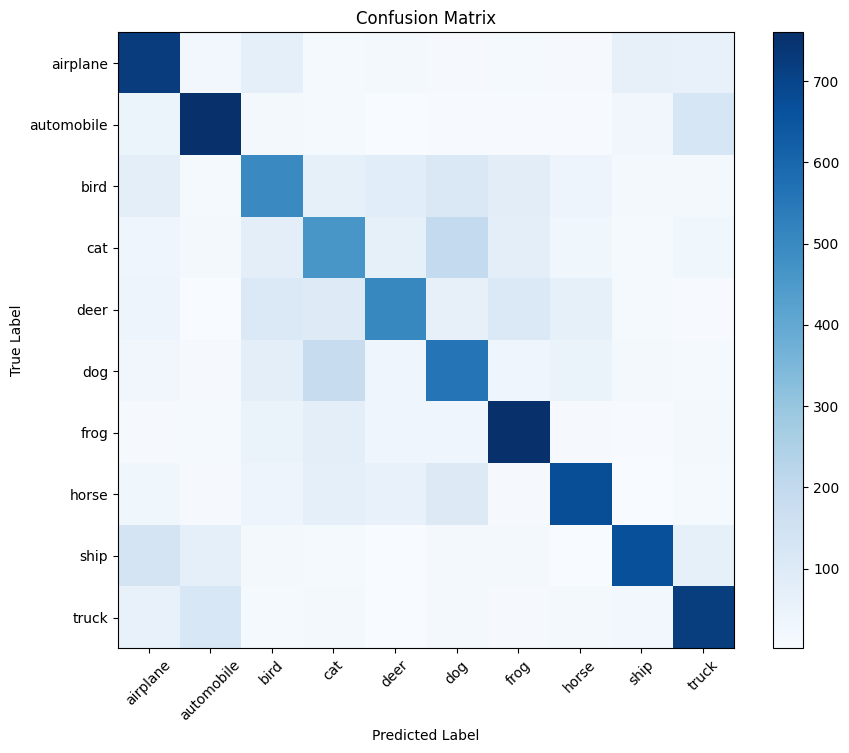

In [19]:
#Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test_one_hot)
print(f'Test Accuracy: {test_accuracy}')

# Predict the labels for the test set
y_pred = model.predict(x_test_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_one_hot, axis=1)

# Compute and report metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='macro')
recall = recall_score(y_test_classes, y_pred_classes, average='macro')
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(np.arange(10), class_names, rotation=45)
plt.yticks(np.arange(10), class_names)
plt.show()


In [21]:
#Transfer Learning
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load the VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom layers on top of the VGG16 base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(100, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Create the new model
transfer_model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of VGG16
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the training data
VGG16history = transfer_model.fit(x_train_normalized, y_train_one_hot, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the transfer learning model on the test data
test_loss, test_accuracy = transfer_model.evaluate(x_test_normalized, y_test_one_hot)
print(f'Test Accuracy with VGG16: {test_accuracy}')


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 682s 544ms/step - accuracy: 0.4482 - loss: 1.5770 - val_accuracy: 0.5635 - val_loss: 1.2616
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 652s 521ms/step - accuracy: 0.5760 - loss: 1.2159 - val_accuracy: 0.5805 - val_loss: 1.2008
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 680s 519ms/step - accuracy: 0.5971 - loss: 1.1552 - val_accuracy: 0.5848 - val_loss: 1.1935
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 706s 538ms/step - accuracy: 0.6153 - loss: 1.1090 - val_accuracy: 0.5876 - val_loss: 1.1798
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 671s 529ms/step - accuracy: 0.6242 - loss: 1.0741 - val_accuracy: 0.5970 - val_loss: 1.1578
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 685s 532ms/step - accuracy: 0.6336 - loss: 1.0463 - val_accuracy: 0.6012 - val_loss: 1.1431
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 684s 534ms/step - accuracy: 0.6436 - loss: 1.0104 - val_accuracy: 0.6022 - val_loss: 1.1447
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 680s 533ms/step - ac

In [22]:
# Save the trained transfer learning model
transfer_model.save('cifar10_transfer_vgg16.keras')
print('Transfer learning model saved as cifar10_transfer_vgg16.h5')

Transfer learning model saved as cifar10_transfer_vgg16.h5
